In [ ]:
앙상블 모델이 아닌것은?
1. GBM
2. 랜덤 포레스트
3. XGBoost
4. Decision Tree

답은 4번

In [ ]:
하이퍼 파라메터를 설명해 보세요.

loss = error 오차
loss function : 손실함수
cost function : 비용함수
objective function : 목적함수
learning_rate(eta) : 학습률(에러를 조금씩 수정해 나가는데 얼마만큼 수정할 것인가?)
n_estimators : weak learner를 사용할 것인가(분류기를 몇 개를 동원할 것인가?)
subsample : overfitting을 방지하기 위해서 1보다 작은 값으로 설정 가능. 기본값은 1(전체데이터 사용)
early_stopping_rounds : 조기중단(최소 오차지점에서 몇 번 더 검사를 할 것인가)

In [ ]:
bootstrapping으로 데이터를 나눌때 한 데이터가 여러번 뽑히거나 한 데이터가 아예 안 뽑힐 수도 있다.
-> O

GBM보다 실행 속도가 빠른 알고리즘(2가지)은?
-> XGBoost, LightGBM

voting방식과 Bagging방식의 차이점은?
-> voting: 모든 데이터에 대하여, 서로 다른 알고리즘을 가진 분류기를 결합한 것이다.
-> Bagging: 1개의 알고리즘과 여러 개의 데이터 샘플을 나누어 가진다.

In [ ]:
앙상블 기법의 조건
- 각각의 분류기는 상호 독립적이어야 한다.
- 각 분류기의 오분률은 적어도 50% 보다는 낮아야 한다.

In [ ]:
틀린것을 고르시오.
1. 앙상블 학습의 목표는 다양한 의견을 수렴하여 신뢰성 높은 예측값을 얻는 것이다.
2. 보팅은 서로 다른 아로리즘을 갖는 것이다.
3. 배깅은 데이터 샘플을 서로 다르게 하지만 같은 알고리즘을 갖는다.
4. 보팅 방식의 대표는 랜덤 포레스트이다.
5. 배깅 방식은 중첩을 허용한다.
-> 4 /랜덤포레스트는 보팅이 아니라 베깅이다.

틀린것을 고르세요.
1. 하드 보팅은 다수결의 원칙과 비슷하고, 소프트 보팅은 각 확률의 평균하여 예측 결정한다.
2. 보팅 방식은 여러개의 분류기를 결합해서 예측 성능이 좋아진다.
3. 랜덤 포레스트는 각자의 데이터 샘플링을 하고 최종적으로 소프트 보팅으로 예측 결정한다. 
4. 부트스트래핑이란 데이터를 중복을 허용하면서 샘플링하는 것이다. 
5. 랜덤 포레스트의 트리를 분할하는 피처를 참조 시 sqrt(전체)가 아닌 전체이다.
-> 5 /숲을 만들때 나무들이 키가 다 다르다.

틀린것을 고르세요.
1. 부스팅 방식은 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선해가는 학습 방식이다.
2. GBM은 경사하강법을 사용한다. 
3. GBM은 랜덤포레스트 보다 예측성능이 뛰어나지만 시간이 오래 걸린다는 단점이 있다. 
4. XGBoost는 랜덤포레스트보다는 속도가 느리지만 GBM에 비해 학습 속도가 빠르다. 
5. 파이썬 XGBoost와 사이킷런 XGBoost는 early_stopping_rounds를 제공하지 않는다.
-> 5(별로 중요한건x)

In [ ]:
XGBoost 에서 과적합 문제를 해결하기 위해 고려해야 할 사항이 아닌 것은?
a. max_depth 값을 낮춘다. /너무 자세하게 하지 말아라
b. min_child_weight 값을 낮춘다. /낮추게 된다면 더 쪼개고 섬세하게 나눈다는 것(작은 차이를 잡아낼때 사용)
c. gamma 값을 높인다. /규제의 수준을 높인다.그렇게 되면 섬세하게 반응하지 않는다.
d. eta 값을 낮춘다. /낮춘다는건 섬세하게 반응하게 한다는 것.
-> b,d

앙상블 학습 방식 중 맞추기 어려운 문제를 맞추는 것이 목적으로, 에러에 가중치를 주는 방식은?
-> Boosting

분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을
최종 보팅 결과값으로 선정하는 보팅 방식은?
-> soft voting

머신러닝에서 여러개의 분류기로 데이터를 학습하고 각각 학습된 알고리즘으로 결과를 예측하고 그 결과들을 결합해
최종으로 더 나은 결과를 도출해내는 방식을 무엇이라고 하나요?
-> 앙상블

머신러닝에서의 앙상블의 대표적인 유형 3가지를 말해주세요.
-> 보팅, 배깅, 부스팅

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris() 

lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)
gnb_clf = GaussianNB()
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft') 

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2)
vo_clf.fit(X_train,y_train) 
pred = vo_clf.predict(X_test) 
accuracy_score(y_test, pred) 

0.9333333333333333

# LightGBM

In [4]:
import lightgbm

In [30]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

C:\Users\admin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\admin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [31]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9877


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

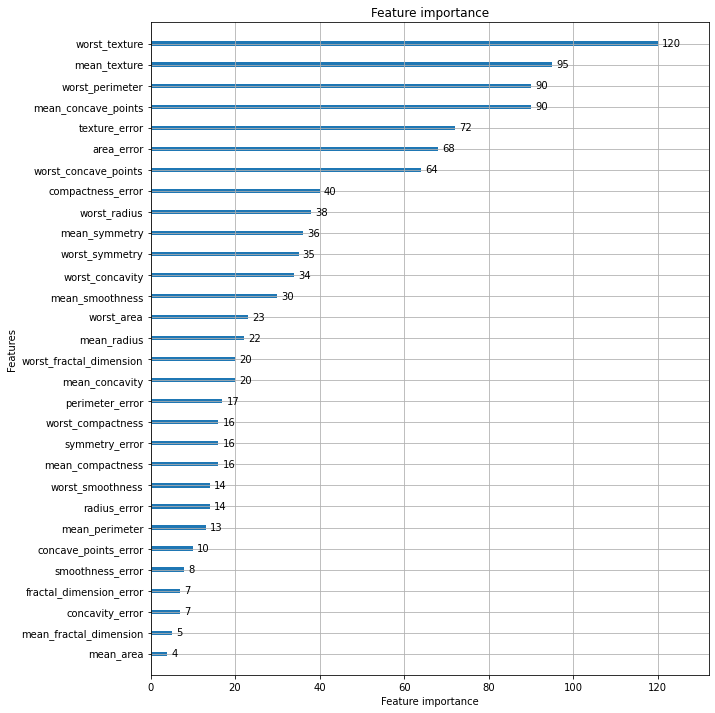

In [32]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

# HyperOpt로 최적의 하이퍼 파라미터 찾기

In [19]:
pip install hyperopt

In [44]:
# 1. 범위 설정
from hyperopt import hp

search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y',-15,15,1)}

In [ ]:
retval = x**2 - 20*y

In [45]:
# 2. 함수 설정
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

# x=0, y=-15

In [46]:
# 최적의 입력값을 유추하기
from hyperopt import fmin, tpe, Trials
trails = Trials()

In [47]:
# 3. fmin()으로 x,y값 찾기
import numpy as np

best02 = fmin(fn= objective_func, space= search_space, algo= tpe.suggest, max_evals= 5,
    trials= trails, rstate= np.random.default_rng(seed=0))

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 625.74trial/s, best loss: -224.0]


In [30]:
print(best02)  # 최적화를 위한 x,y를 찾아줌

{'x': -4.0, 'y': 12.0}


위에 목적함수 정할때의 x,y 값과 최적화 값과 다르다.

In [34]:
best03 = fmin(fn= objective_func, space= search_space, algo= tpe.suggest, max_evals= 100,
    trials= trails, rstate= np.random.default_rng(seed=0))
print(best03) # 100번을 다시 돌렸다.

100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 116.47trial/s, best loss: -299.0]
{'x': -1.0, 'y': 15.0}


정확한 값을 바로 내진 못했지만 거의 근접한 값을 내주고 있다.

In [43]:
# 속성확인
trails.results

[{'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -296.0, 'status': 'ok'},
 {'loss': -40.0, 'status': 'ok'},
 {'loss': 281.0, 'status': 'ok'},
 {'loss': 64.0, 'status': 'ok'},
 {'loss': 100.0, 'status': 'ok'},
 {'loss': 261.0, 'status': 'ok'},
 {'loss': -276.0, 'status': 'ok'},
 {'loss': -264.0, 'status': 'ok'},
 {'loss': -296.0, 'status': 'ok'},
 {'loss': -299.0, 'status': 'ok'},
 {'loss': -156.0, 'status': 'ok'},
 {'loss': 161.0, 'status': 'ok'},
 {'loss': -244.0, 'status': 'ok'},
 {'loss': -136.0, 'status': 'ok'},
 {'loss

In [48]:
dataset = load_breast_cancer()
X = features = dataset.data
y = labels = dataset.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=156)

In [50]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   }

In [51]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

C:\Users\admin\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [53]:
from hyperopt import fmin, tpe, Trials
import warnings
warnings.filterwarnings('ignore')

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best) 

100%|███████████████████████████████████████████████| 50/50 [00:05<00:00,  9.34trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


In [54]:
xgb_clf = XGBClassifier(n_estimators=100, max_depth=17,
                            min_child_weight=2,
                            learning_rate=.126,
                            colsample_bytree=.54)

In [55]:
xgb_clf.fit(X_train, y_train)

[11:50:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.54,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.126, max_delta_step=0, max_depth=17,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
preds = xgb_clf.predict(X_test)

In [58]:
accuracy_score(y_test, preds)

0.9473684210526315

# 산탄데르 고객만족 예측

In [68]:
import os
os.getcwd()

'C:\\Users\\admin'

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [95]:
# 데이터 전처리
df = pd.read_csv('train.csv')
print('dataset shape:', df.shape)

dataset shape: (76020, 371)


In [96]:
df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [98]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [104]:
# df.target 에서 0과 1의 %는?
df.TARGET.value_counts()  # 이건 갯수
df.TARGET.value_counts()/len(df) # 나눴으니 이건 %

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [108]:
# df['var3'].min()의 값인 -999999를 2로 바꾸어 주세요.
df['var3'] = df['var3'].replace(-999999,2)
df[:3]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [120]:
# 칼럼이 371개가 있는데 ID 지우고, TARGET은 label로 분리하기
X = features = df.iloc[:, 1:-1]
y = label = df.iloc[:, -1]

In [121]:
X.shape

(76020, 369)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [125]:
# 잘 쪼개졌는지 확인
y_train.value_counts() / len(y_train)

0    0.960964
1    0.039036
Name: TARGET, dtype: float64

In [124]:
y_train.value_counts() / len(y_test)

0    3.843857
1    0.156143
Name: TARGET, dtype: float64

In [126]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=0)

In [127]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [129]:
xgb_clf = XGBClassifier(n_estimator= 100, learning_rate= 0.05, random_state= 156)

In [131]:
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds= 100, eval_metric= 'auc', eval_set=[(X_tr, y_tr),
                                                                                 (X_val, y_val)])

[14:44:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=100, n_estimators=100,
              n_jobs=6, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
preds = xgb_clf.predict(X_test)

In [135]:
accuracy_score(y_test, preds)

0.9583004472507235

In [137]:
roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
# 면적

0.8397812474965844

# hyperOpt 적용

In [139]:
# 공간이라는 범위 설정
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2) }

In [141]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           colsample_bytree=search_space['colsample_bytree'],
                           learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list) 

## fmin( ) 적용

In [142]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best) 

[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

KeyboardInterrupt: 

# LightGBM + HyoerOpt

In [152]:
lgbm_search_space = {'num_leaves' : hp.quniform('num_leaves', 32, 64, 1),
                    'max_depth': hp.quniform('max_depth', 100, 160., 1), 
                    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                    'subsample': hp.uniform('subsample', 0.7, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2) }

def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100,
                                  max_depth=int(search_space['max_depth']),
                                  learning_rate=search_space['learning_rate'])
    
    roc_auc_list = []

    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best) 

[1]	training's auc: 0.82489	training's binary_logloss: 0.162225	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.163483
[2]	training's auc: 0.827172	training's binary_logloss: 0.160137	valid_1's auc: 0.80445	valid_1's binary_logloss: 0.161786
[3]	training's auc: 0.833292	training's binary_logloss: 0.15829	valid_1's auc: 0.807871	valid_1's binary_logloss: 0.160307
[4]	training's auc: 0.834189	training's binary_logloss: 0.15663	valid_1's auc: 0.807478	valid_1's binary_logloss: 0.159032
[5]	training's auc: 0.835092	training's binary_logloss: 0.155106	valid_1's auc: 0.808465	valid_1's binary_logloss: 0.157796
[6]	training's auc: 0.836472	training's binary_logloss: 0.153704	valid_1's auc: 0.808726	valid_1's binary_logloss: 0.156695
[7]	training's auc: 0.836836	training's binary_logloss: 0.152412	valid_1's auc: 0.808501	valid_1's binary_logloss: 0.155685
[8]	training's auc: 0.8385	training's binary_logloss: 0.151219	valid_1's auc: 0.810052	valid_1's binary_logloss: 0.154734
[9]	training's